**1) Generate a data set D with 500 elements such that D contains :
100 random numbers (without any decimal points) in the range
of [0-9], 100 random numbers in the range of [10-99], 100 random
numbers in the range of [100-999], 100 random numbers in the
range of [1000-9999], 100 random numbers in the range of [10000-
99999]. D will have 100 single digit numbers, 100 2-digit numbers,
100 3-digit numbers, 100 4-digit numbers, 100 5-digit numbers.
Use K-means clustering algorithm to cluster the elements of D
into k-number of clusters (here k is optimum number of clusters
of D obtained through elbow method). Compute the Silhouette
Score of your learning model. Visualise the clusters through a
scatter plot. Here D contains, 1-digit, 2-digit,3-digit, 4-digit, 5-
digit numbers. In all probability, one can expect that D can be
clusterd in to 5 clusters such that all the single digit numbers
form one cluster, all the 2-digit numbers form a cluster and so
on. Based on the output of your experiment, con rm whether
your clusters are as described above. If the obtained clusters are
not as described above, identify the reasons for that.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

In [2]:
array = []
def rand_df(l,u,array):
  for i in range(0,100):
    temp = randint(l,u)
    array.append(temp)
rand_df(0,9,array)
rand_df(10,99,array)
rand_df(100,999,array)
rand_df(1000,9999,array)
rand_df(10000,99999,array)

In [3]:
cols = ['numbers1']
data = np.array(array)
df = pd.DataFrame(data=data, columns=cols)
df

,numbers1
0,7
1,3
2,9
3,9
4,7
...,...
495,18666
496,37781
497,37411
498,41552


In [4]:
df.insert(1, "numbers2", array, True)

In [5]:
from sklearn.cluster import KMeans
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[553940124596.3999,
 78965495272.09216,
 31964752097.56251,
 19559116597.03184,
 13026981155.236513,
 7578345708.689916,
 5382905971.981355,
 4214942977.901426,
 3280065370.2936816,
 2494247418.01198,
 1856035270.342371,
 1485485243.9181302,
 1312361655.0387535,
 1170776435.1581016,
 985679373.9262881]

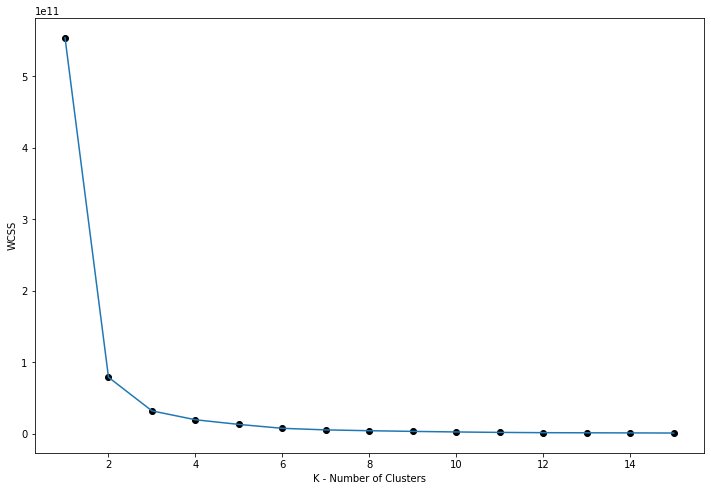

In [7]:
# Plot visualization b/w WCSS and Number of Clusters(K)
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.xlabel("K - Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Taking k=5**

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter= 300, n_init=10, random_state=0)
kmeans.fit(df)

KMeans(init='random', n_clusters=5, random_state=0)

In [9]:
y_clusters = kmeans.predict(df)
y_clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [10]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, y_clusters)
silhouette_avg

0.763846540060711

In [11]:
x_array = np.array(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


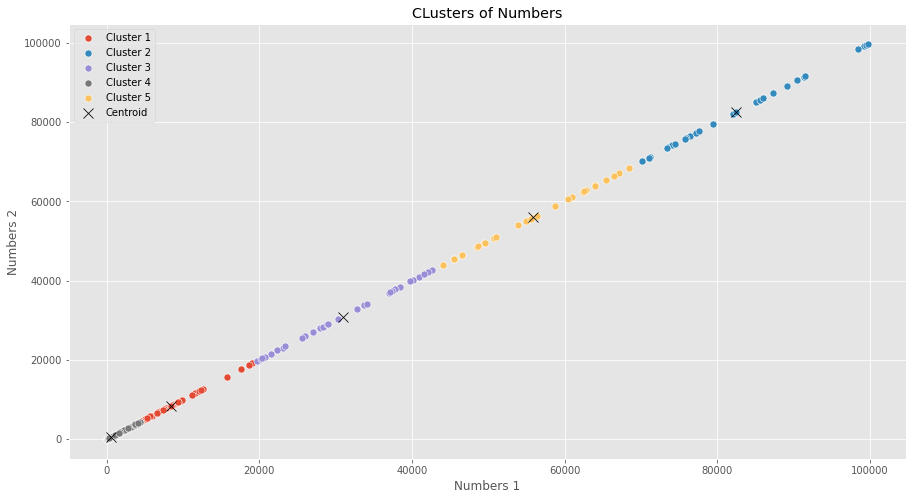

In [12]:
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('CLusters of Numbers')
plt.xlabel('Numbers 1')
plt.ylabel('Numbers 2') 

sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

***As said in the question, the dataset can be clustered in to 5 clusters such that all 1-digit belongs to 1 cluster, 2-digit to another cluster,and so on***

**2) Generate a dataset D with 100 three letter english words, with
only lowercase letters. Assign a unique number for each of the
words, called as `weight of a word (denoted as W(w)) as follows
: Let the index value of a, denoted as I(a) is 1, index value of b
, denoted as I(b) is 2,..., I(y) = 25, I(z) = 26.
W(x1x2x3) = I(x1) + I(x2) + I(x3)
where x1 is the  rst letter of the word, x2 is the second let-
ter of the word, x3 is the second letter of the word. For eg.,
W(and)=1+14+4=19. Construct a new data set D' which con-
tains the weights of all the words of D. Please generate the dataset
D with the three letter words whose weights are di erent. Clus-
ter D' using K-means clustering model. Visualise the clusters and
compute the Silhouette Score. Clusters of D' will have weights of
the words. Replace each weight in each clusters, with the respec-
tive word. Output the clusters of D. Observe the clusters of D
and record your inferences based on the clustering.**

In [13]:
import string
import random
lower_upper_alphabet = string.ascii_lowercase
array = []
for i in range(100):
  temp = ""
  for j in range(3):
    random_letter = random.choice(lower_upper_alphabet)
    temp = temp + random_letter
  array.append(temp)
cols = ['strings']
data = np.array(array)
D = pd.DataFrame(data=data, columns=cols)
D

,strings
0,lgg
1,cbv
2,tkg
3,zkd
4,ywi
...,...
95,hgw
96,qhc
97,ikd
98,adl


In [14]:
weights=[]
for i in array:
  tmp = 0
  for j in i:
    tmp = tmp + ord(j)-96
  weights.append(tmp)
cols = ['weights']
data = np.array(weights)
D2 = pd.DataFrame(data=data, columns=cols)
D2

,weights
0,26
1,27
2,38
3,41
4,57
...,...
95,38
96,28
97,24
98,17


In [15]:
D2.insert(1, "weights2", weights, True)

In [16]:
from sklearn.cluster import KMeans
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(D2)
    wcss.append(kmeans.inertia_)
wcss

[33783.12000000001,
 13003.288888888892,
 4594.906689303905,
 2513.0777859282352,
 1747.883453944429,
 1113.4271450288843,
 795.365216070479,
 611.9652160704793,
 480.80437690964004,
 389.2659153711785,
 312.47312409812406,
 250.03085803085804,
 208.617155067155,
 185.9915750915751,
 165.84233544233544]

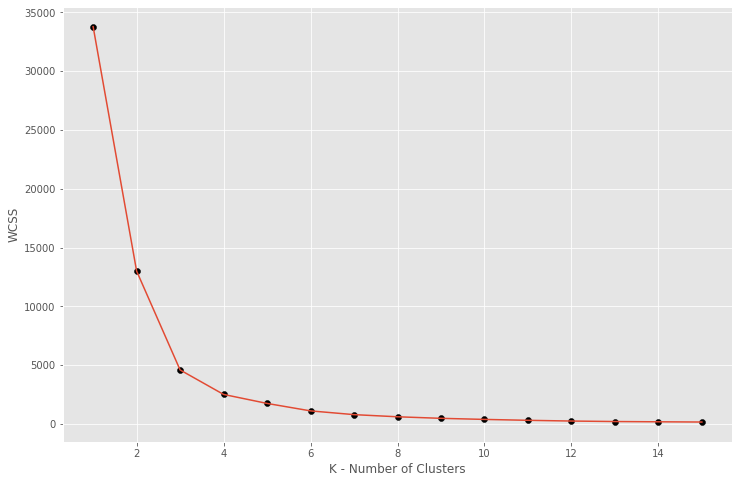

In [17]:
# Plot visualization b/w WCSS and Number of Clusters(K)
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.xlabel("K - Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Taking k=7**

In [18]:
kmeans = KMeans(n_clusters = 7, init = 'random', max_iter= 300, n_init=10, random_state=0)
kmeans.fit(D2)

KMeans(init='random', n_clusters=7, random_state=0)

In [19]:
y_clusters = kmeans.predict(D2)

In [20]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(D2, y_clusters)
silhouette_avg

0.5955448983644225

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


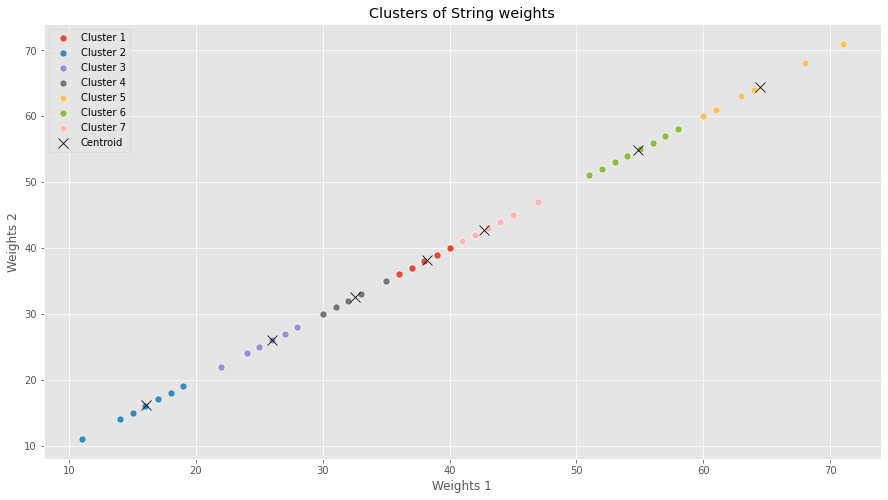

In [21]:
x_array = np.array(D2)
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters of String weights')
plt.xlabel('Weights 1')
plt.ylabel('Weights 2') 

sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50)
sns.scatterplot( x = x_array[y_clusters == 5, 0], y = x_array[y_clusters == 5, 1], label = "Cluster 6", s = 50)
sns.scatterplot( x = x_array[y_clusters == 6, 0], y = x_array[y_clusters == 6, 1], label = "Cluster 7", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

In [22]:
for i in D2.columns:
  ind = 0
  for j in D2[i]:
    temp = D['strings'][ind]
    D2[i][ind] = temp
    ind =ind+1
D2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,weights,weights2
0,lgg,lgg
1,cbv,cbv
2,tkg,tkg
3,zkd,zkd
4,ywi,ywi


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


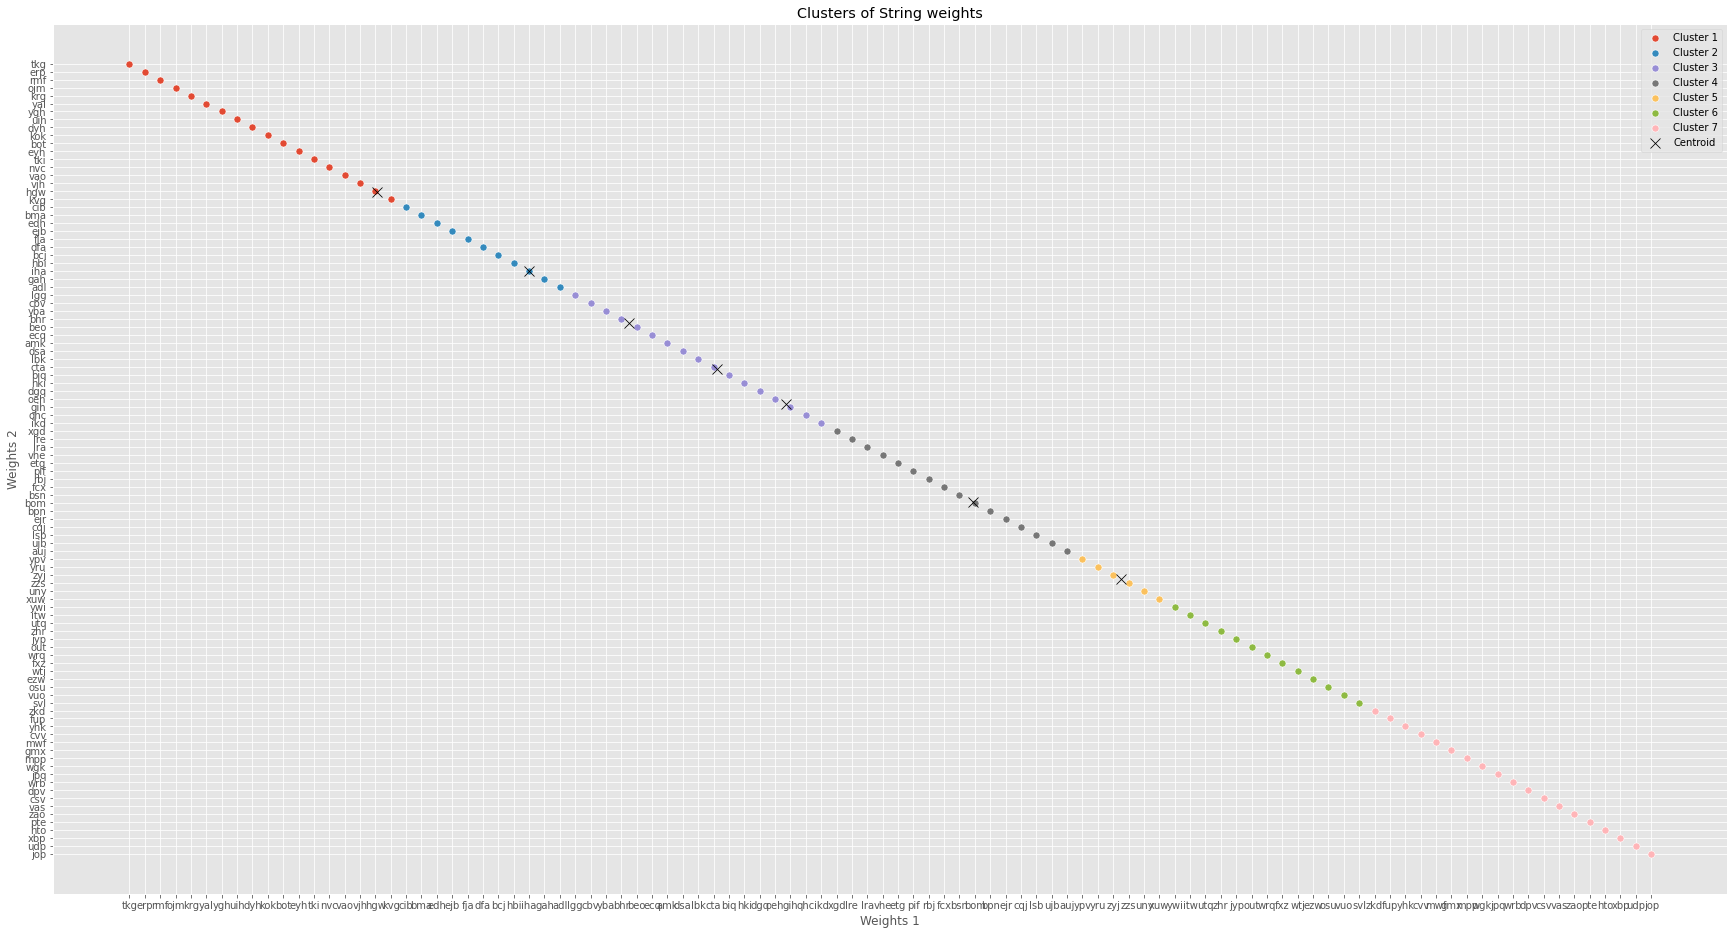

In [23]:
x_array = np.array(D2)
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(30,16))
plt.title('Clusters of String weights')
plt.xlabel('Weights 1')
plt.ylabel('Weights 2') 

sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50)
sns.scatterplot( x = x_array[y_clusters == 5, 0], y = x_array[y_clusters == 5, 1], label = "Cluster 6", s = 50)
sns.scatterplot( x = x_array[y_clusters == 6, 0], y = x_array[y_clusters == 6, 1], label = "Cluster 7", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

***From the above scatter plot results We can infer that clustering and visualizing with the weights of the strings are far more efficient. The scatter plot for weights show the clusetering and the centroids more accurately than visualizing the same with the letters in alphabetical order***

In [25]:
iris = pd.read_csv("Iris.csv")
iris = iris[iris.columns[1:]]
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
D = iris.copy()
D = D[D.columns[:-1]]
D.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
from sklearn.cluster import KMeans
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
wcss

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.06387443273313,
 27.842356060606072,
 26.04820224804435,
 24.53046205587498,
 22.75855952380953,
 21.674776515151514,
 20.300946969696973,
 19.0484107004107]

**Taking K=3**

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter= 300, n_init=10, random_state=0)
kmeans.fit(D)

KMeans(init='random', n_clusters=3, random_state=0)

In [29]:
y_clusters = kmeans.predict(D)

In [30]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(D, y_clusters)
silhouette_avg

0.5525919445499757

In [31]:
x_array = np.array(D)

**Based on Sepal Dimensions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


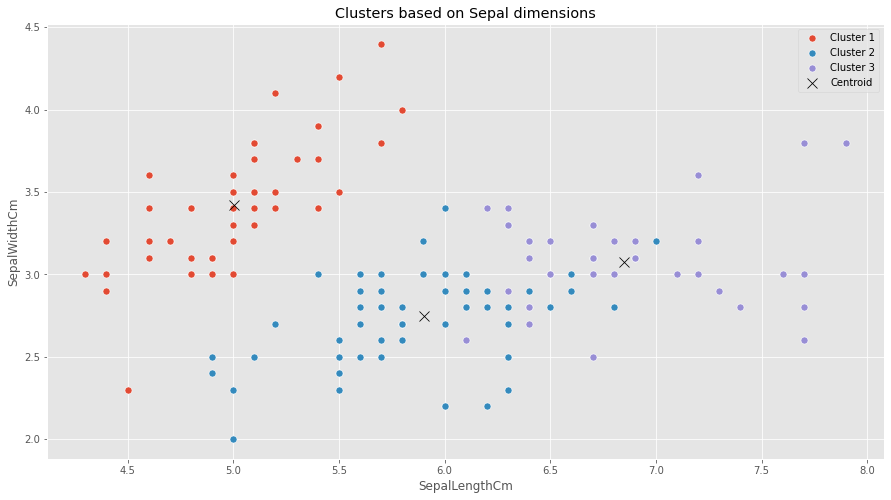

In [32]:
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters based on Sepal dimensions')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm') 

sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

In [33]:
import collections
clus1=[]
for a in x_array[y_clusters == 0, 0]:
  for b in x_array[y_clusters == 0, 1]:
    for p in iris.values:
      if p[0] == a and p[1] == b:
        clus1.append(p[4])
occ1 = collections.Counter(clus1)
print('For Cluster 1: ', occ1)

For Cluster 1:  Counter({'Iris-setosa': 1271, 'Iris-versicolor': 54})


In [34]:
import collections
clus2=[]
for a in x_array[y_clusters == 1, 0]:
  for b in x_array[y_clusters == 1, 1]:
    for p in iris.values:
      if p[0] == a and p[1] == b:
        clus2.append(p[4])
occ2 = collections.Counter(clus2)
print('For Cluster 2: ', occ2)

For Cluster 2:  Counter({'Iris-versicolor': 1279, 'Iris-virginica': 836, 'Iris-setosa': 69})


In [35]:
import collections
clus3=[]
for a in x_array[y_clusters == 2, 0]:
  for b in x_array[y_clusters == 2, 1]:
    for p in iris.values:
      if p[0] == a and p[1] == b:
        clus3.append(p[4])
occ3 = collections.Counter(clus3)
print('For Cluster 3: ', occ3)

For Cluster 3:  Counter({'Iris-virginica': 662, 'Iris-versicolor': 233})


**Based on Pepal Dimensions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


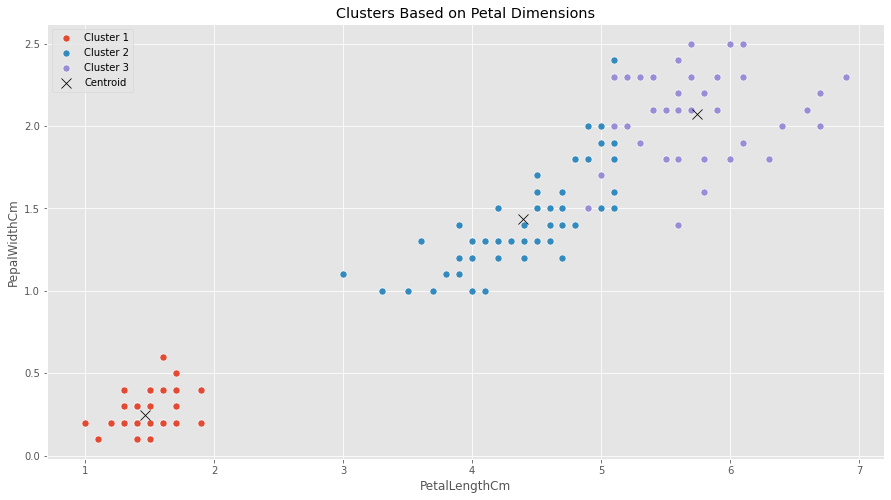

In [36]:
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters Based on Petal Dimensions')
plt.xlabel('PetalLengthCm')
plt.ylabel('PepalWidthCm') 

sns.scatterplot( x = x_array[y_clusters == 0, 2], y = x_array[y_clusters == 0, 3], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 2], y = x_array[y_clusters == 1, 3], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 2], y = x_array[y_clusters == 2, 3], label = "Cluster 3", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],marker='x',color='black',label='Centroid',s=100)
plt.show()

In [37]:
import collections
clus1=[]
for a in x_array[y_clusters == 0, 2]:
  for b in x_array[y_clusters == 0, 3]:
    for p in iris.values:
      if p[2] == a and p[3] == b:
        clus1.append(p[4])
occ1 = collections.Counter(clus1)
print('For Cluster 1: ', occ1)

For Cluster 1:  Counter({'Iris-setosa': 8447})


In [38]:
import collections
clus2=[]
for a in x_array[y_clusters == 1, 2]:
  for b in x_array[y_clusters == 1, 3]:
    for p in iris.values:
      if p[2] == a and p[3] == b:
        clus2.append(p[4])
occ2 = collections.Counter(clus2)
print('For Cluster 2: ', occ2)

For Cluster 2:  Counter({'Iris-versicolor': 1816, 'Iris-virginica': 316})


In [39]:
import collections
clus3=[]
for a in x_array[y_clusters == 2, 2]:
  for b in x_array[y_clusters == 2, 3]:
    for p in iris.values:
      if p[2] == a and p[3] == b:
        clus3.append(p[4])
occ3 = collections.Counter(clus3)
print('For Cluster 3: ', occ3)

For Cluster 3:  Counter({'Iris-virginica': 523, 'Iris-versicolor': 5})


***From the above results we can see that, by visualizing upon both Sepal and Petal dimensions, we can conclude that, the clustering is almost perfect with both the results pointing to:***

***Cluster 1 -> Iris-sentosa | Cluster 2 -> Iris-virginica | Cluster 1 -> Iris-versicolor***

***Note: There exists a very small amount of outliers in each cluster***

**4) Download a dataset of your choice. Cluster the dataset by train-
ing the following models: K-means clustering and the Agglomera-
tive clustering (cluster into same number of clusters as done with
the k-means clustering model). For each of the models, visualise
the clusters through a scatter plot, compute the centroid of each
clusters and compute the respective Silohuette score . Based on
your experiment, which model (either k-means or agglomerative)
has learnt well.**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
mall_customers = pd.read_csv("Mall_Customer.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
X = mall_customers.iloc[:, [3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [44]:
from sklearn.cluster import KMeans
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204,
 13165.329070181628,
 12064.939000692291]

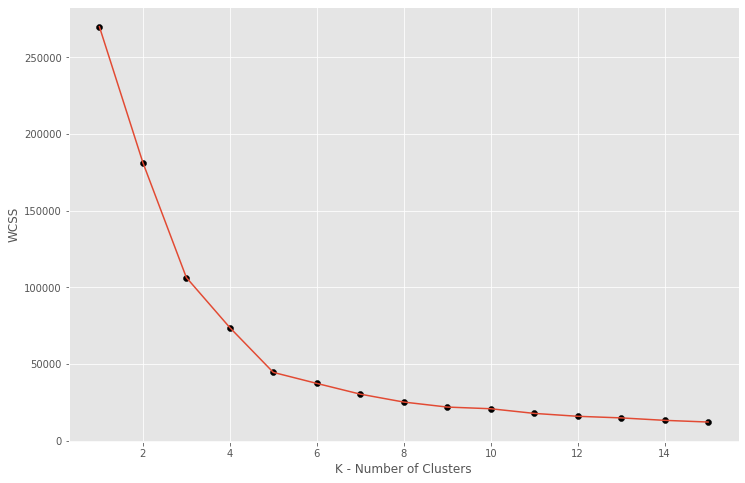

In [45]:
# Plot visualization b/w WCSS and Number of Clusters(K)
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.xlabel("K - Number of Clusters")
plt.ylabel("WCSS")
plt.show()

***Taking k=5***

**K-means Clustering:**

In [46]:
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter= 300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(init='random', n_clusters=5, random_state=0)

In [47]:
y_clusters = kmeans.predict(X)

In [48]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.553931997444648

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


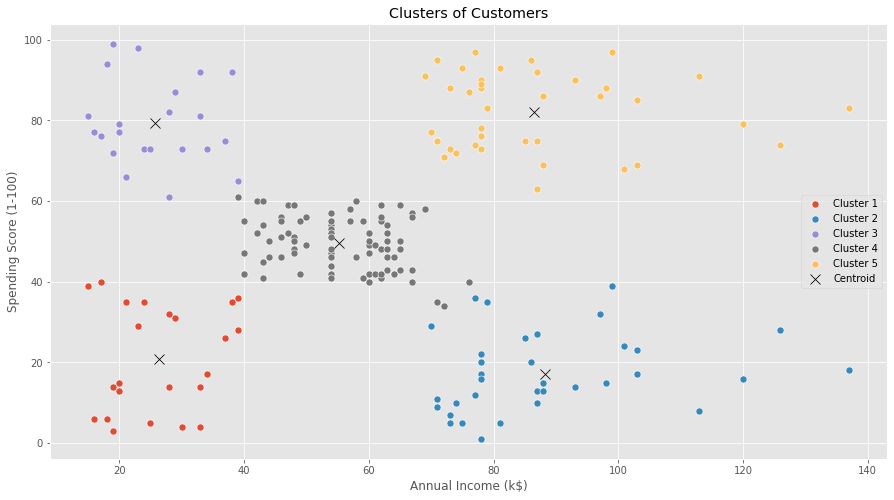

In [49]:
x_array = np.array(X)
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 

# x_array contain two values, Annual Income and Spending Score
# Index 0 - contains Annual Income and index 1 contains spending score
sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

**Agglomerative Clustering:**

In [50]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [51]:
y_hc =hc.fit_predict(X)

In [52]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_hc)
silhouette_avg

0.5529945955148897

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


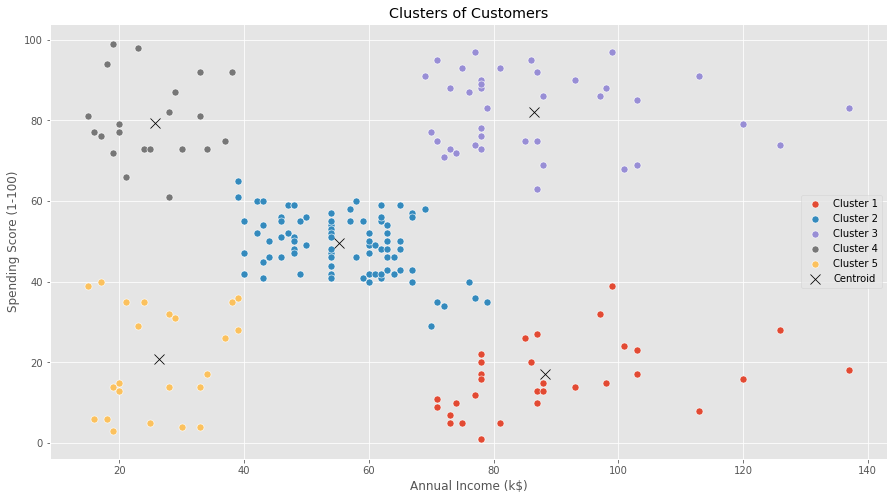

In [53]:
x_array = np.array(X)
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 

# x_array contain two values, Annual Income and Spending Score
# Index 0 - contains Annual Income and index 1 contains spending score
sns.scatterplot( x = x_array[y_hc == 0, 0], y = x_array[y_hc == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_hc == 1, 0], y = x_array[y_hc == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_hc == 2, 0], y = x_array[y_hc == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_hc == 3, 0], y = x_array[y_hc == 3, 1], label = "Cluster 4", s = 50)
sns.scatterplot( x = x_array[y_hc == 4, 0], y = x_array[y_hc == 4, 1], label = "Cluster 5", s = 50)
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

***From the above results we can conclude that, both the models have learned very similarly with almost identical silhouette score with Kmeans having 0.55393 and Agglomerative having 0.55299.***

***Therefore Kmeans has a better sillhouette score then Agglomerative by a very small margin***

5)

In [54]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image
import scipy.cluster.hierarchy as sch

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import scipy.cluster.hierarchy as sch

In [56]:
df = pd.read_csv("Iris.csv")
df = df[df.columns[3:]]
df = df[df.columns[:-1]]
df.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


***Single Linkage (Min Distance):***

Text(0, 0.5, 'Euclidean distance in the space with other variables')

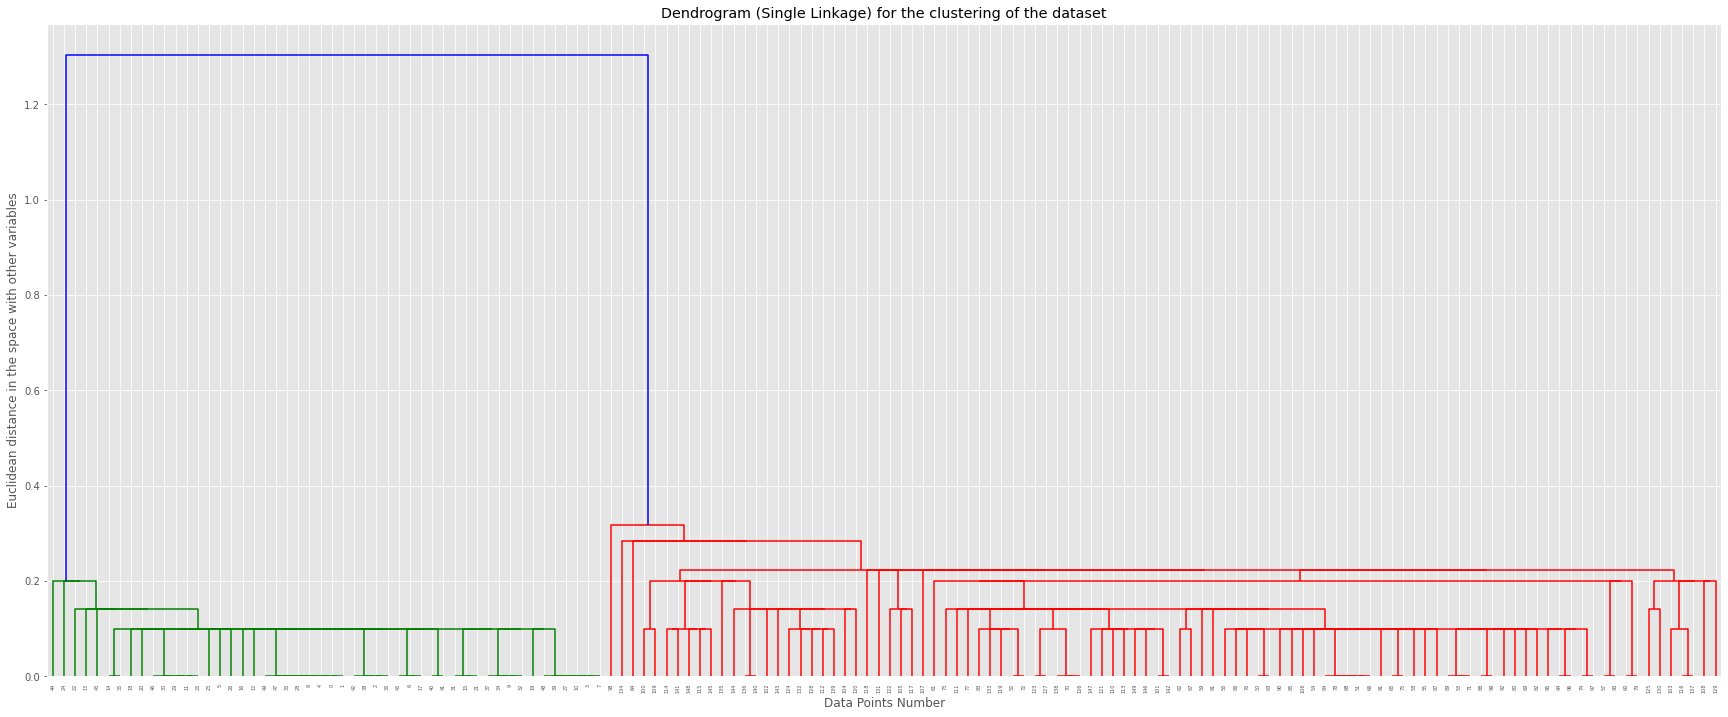

In [57]:
#Single Linkage:
Z = sch.linkage(df, method = 'single')
plt.figure(figsize=(30,12))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

***Complete Linkage (Max Distance):***

Text(0, 0.5, 'Euclidean distance in the space with other variables')

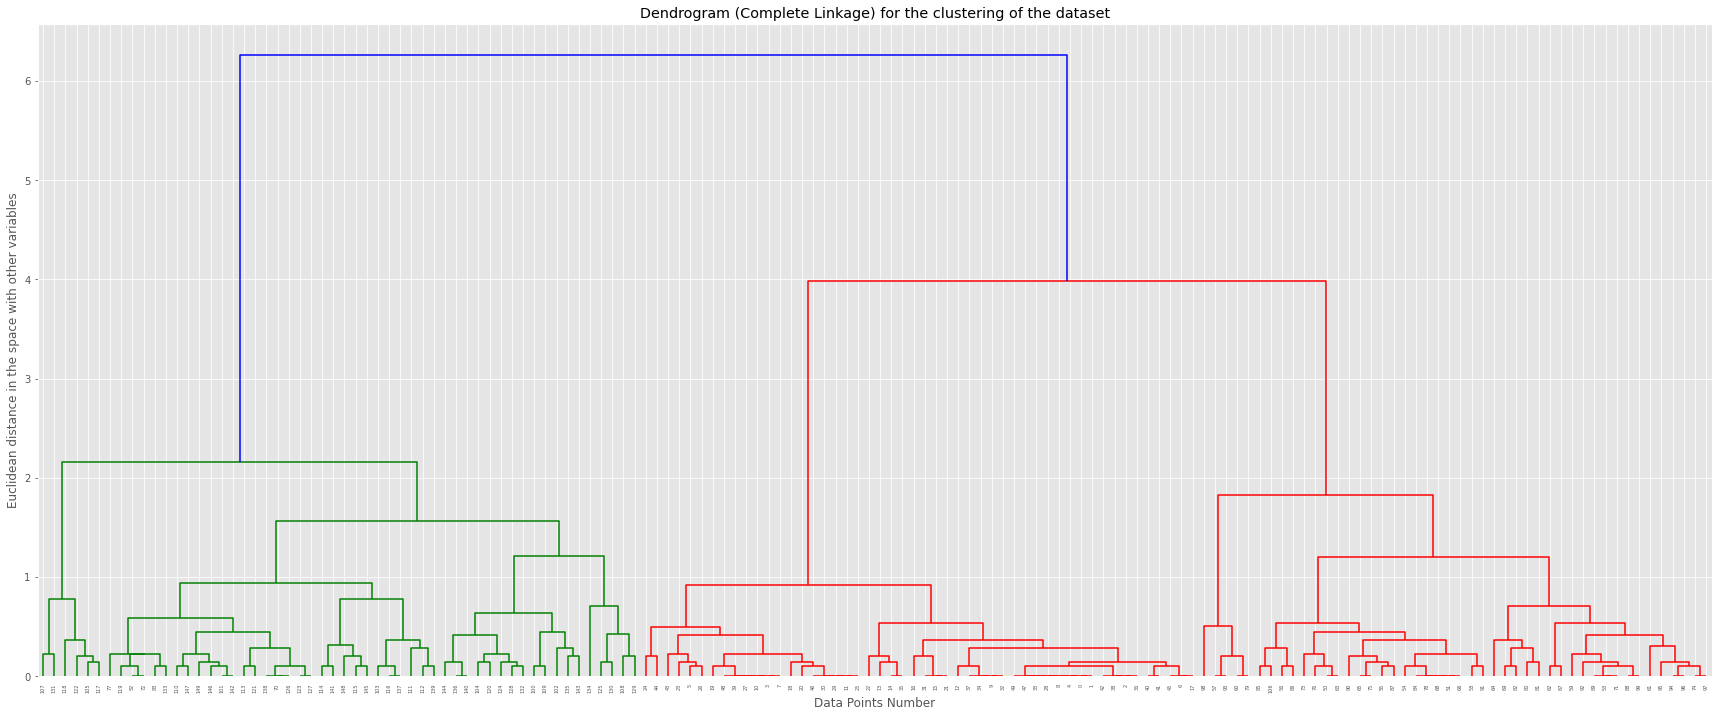

In [58]:
#Complete Linkage:
Z = sch.linkage(df, method = 'complete')
plt.figure(figsize=(30,12))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

***Average Linkage (Avg Distance):***

Text(0, 0.5, 'Euclidean distance in the space with other variables')

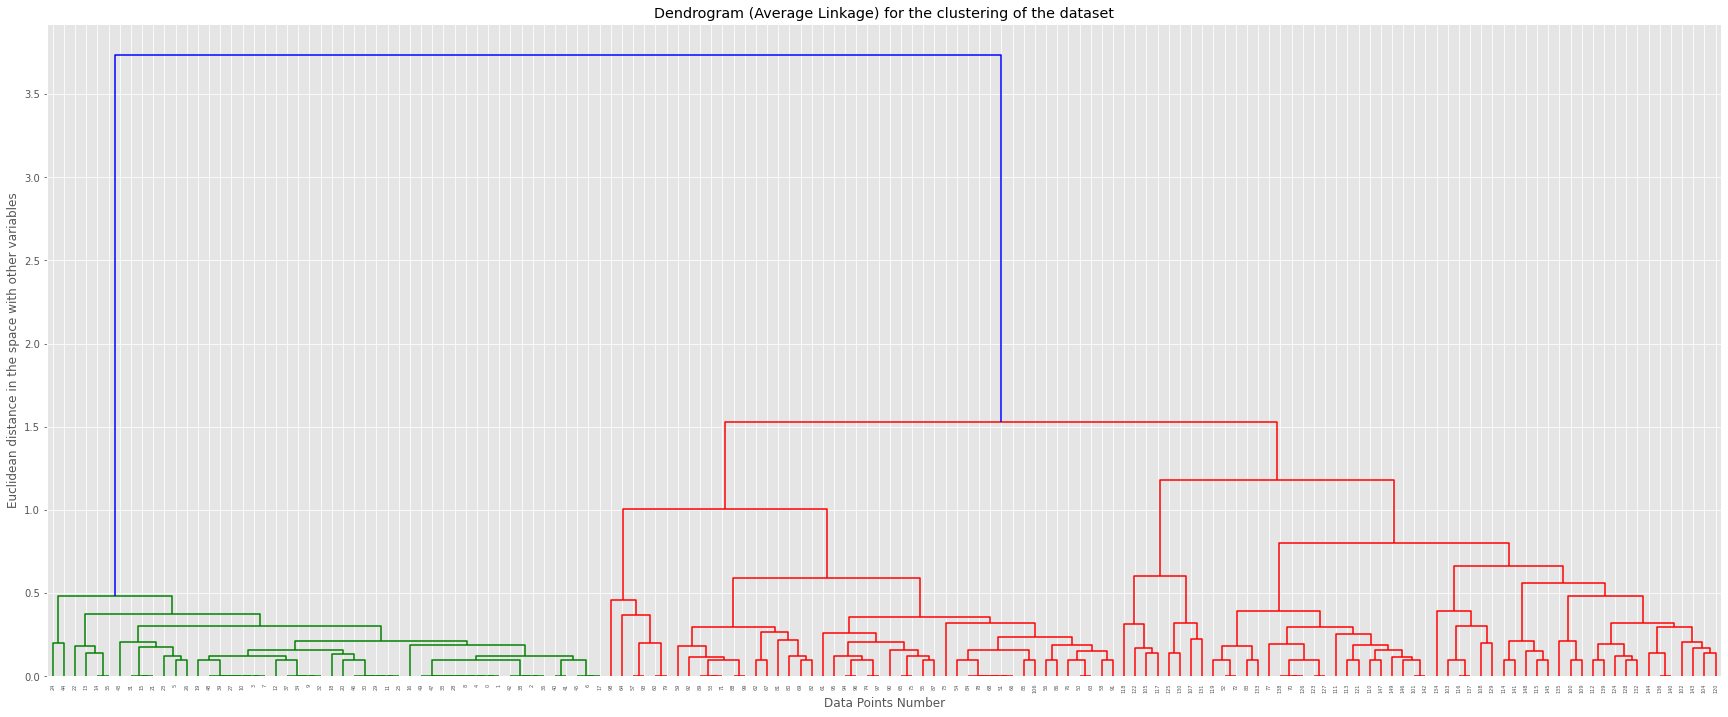

In [59]:
#Average Linkage:
Z = sch.linkage(df, method = 'average')
plt.figure(figsize=(30,12))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

***As we already know that the iris dataset has three classes of flower types, we can see the dendograms and infer that average and complete linkage are better than single linkage is visibly clustering 3 classes***

***Ammong the average and Complete linkages, complete linkage or finding the maximmum distance between two points b/w two clusters is better***